4.5.4


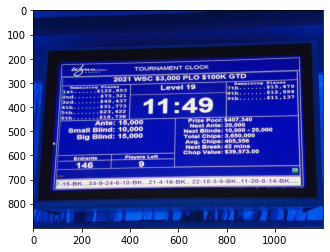

In [272]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

image = cv2.imread('images/52.jpg')
image = cv2.resize(image, )
print (cv2.__version__)

plt.imshow(image)
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [273]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
f = cv2.filter2D(threshold, -1, kernel)


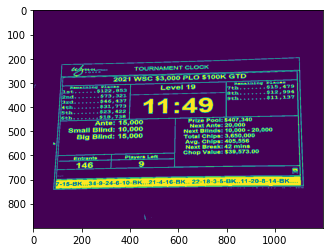

In [274]:
plt.imshow(f)
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [275]:
from pytesseract import Output
custom_config = r'--oem 3 --psm 6 --user-patterns patterns.txt'
    #-c tessedit_char_whitelist=PrizePool$123456789stndrdth.,:'
details = pytesseract.image_to_data(f, output_type=Output.DICT, config=custom_config, lang="eng")

print(len(details['text']))
for i in range(len(details['level'])):
    if (int(details['conf'][i]) >= 0):
        print(str(i) + ": " + str(details['conf'][i]) + "% " + str(details['text'][i]))
box_img = gray

98
4: 16% ean
5: 95% TOURNAMENT
6: 96% CLOCK
8: 14% ;
9: 95% 2021
10: 95% WSC
11: 95% $3,000
12: 95% PLO
13: 90% $100K
14: 90% GTD
16: 35% 7
17: 31% Eee
18: 8% Po
19: 33% cere
20: 11% t
21: 95% aces
23: 0% i~enen
24: 0% Wetrerrr
25: 24% RN
26: 16% Bi
27: 0% seemne
28: 24% eT
29: 0% Cerer
31: 41% jand.....--$73,321
32: 11% Bth......-$12,994
34: 17% PP
35: 0% enen?
36: 0% Cee
37: 0% od
38: 80% Oth......-$11,137
40: 35% l4th....-.-$31,773
41: 87% a
43: 71% Sth.......$23,422
44: 45% =
46: 64% 6th.....-.$18,738
48: 25% VVC
49: 24% TE
50: 0% itikes
51: 22% es
52: 0% -H
53: 27% po
54: 0% iaad
56: 0% ‘
57: 34% ee
58: 0% Uc
59: 0% resly
61: 22% aaa
62: 39% aes:
63: 0% papeed
64: 95% Next
65: 91% Blinds:
66: 92% 10,000
67: 92% -
68: 96% 20,000
70: 93% ig
71: 88% Blind:
72: 96% 15,
73: 27% Be
74: 38% Rel
75: 12% ee
77: 60% x
78: 95% Avg.
79: 95% Chips:
80: 95% 405,556
82: 96% Next
83: 94% Break:
84: 96% 42
85: 96% mins
87: 25% >a
88: 26% See
89: 95% Chop
90: 95% Value:
91: 95% $39,573.00
93: 0% F

<h1>Bounding Boxes</h1>

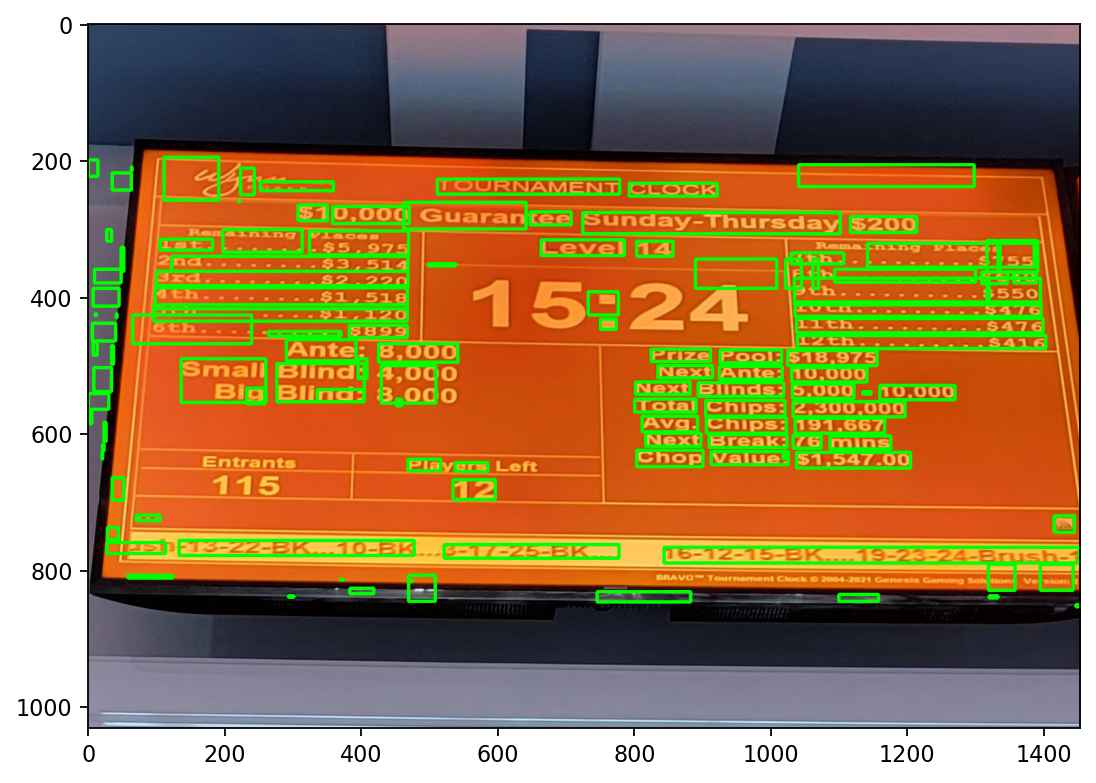

In [216]:

box_img = np.copy(image)
total_box = len(details['text'])

for num in range(total_box):
    if int(details['conf'][num]) >= 0:
        (x,y,w,h) = (details['left'][num], details['top'][num], details['width'][num], details['height'][num])
        box_img = cv2.rectangle(box_img, (x,y), (x+w, y+h), (0,255,0),4)
        
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=160)
plt.imshow(box_img)
plt.show()

0 926 1454 106
594 226 860 398
44 198 1410 610
392 0 1062 119


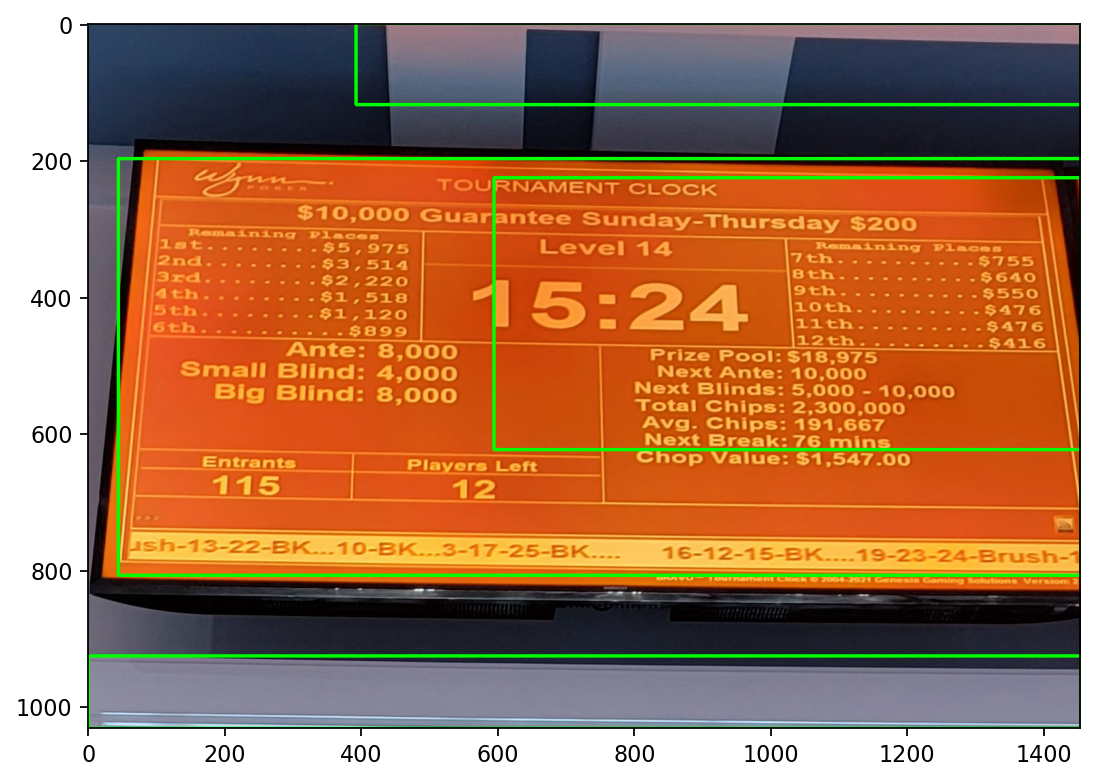

In [220]:
import numpy as np

newImg = np.copy(image)

contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#for c in contours:
#    approx = cv2.approxPolyDP(c, 0.01 * cv2.arcLength(c, True), True)
#    if (len(approx) == 4):
#        cv2.drawContours(newImg, [approx], 0, (0,0,0),5)

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if w*h > 100000:
        print(x,y,w,h)
        newImg = cv2.rectangle(newImg, (x,y), (x+w, y+h), (0,255,0),4)

    

from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=160)
plt.imshow(newImg)
plt.show()

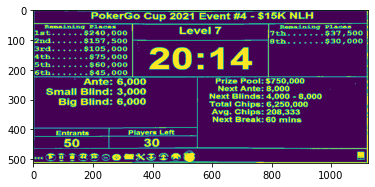

In [206]:
roi = threshold[86:86+513, 35:35+1125]
roiFull = image[86:86+513, 35:35+1125]

plt.imshow(roi)
plt.show()

# Bounding Boxes on Cropped

78
4: 91% PokerGo
5: 96% Cup
6: 96% 2021
7: 96% Event
8: 93% #4
9: 91% -
10: 92% $15K
11: 91% NLH
13: 48% hie
14: 25% TCR
15: 22% TT
16: 95% Level
17: 93% 7
18: 31% van
19: 0% eae
20: 9% ner
21: 0% e
22: 0%  mTT
24: 42% nmd......$157,500
25: 31% Bth.......$30,000
27: 12% iSrd......$105,000
29: 64% 4th.......$75,000
31: 45% Sth.......$60,000
33: 78% 6th.......$45,000
35: 41% Rh!)
36: 96% Prize
37: 95% Pool:
38: 96% $750,000
39: 2% jl
41: 40% .
42: 0% ee
43: 0% U
44: 0% CHEACs')
46: 54% Small
47: 96% Blind:
48: 96% 3,000
49: 38% Reet
50: 42% nt
51: 31% eee
52: 26% eee
53: 3% ky)
55: 96% Big
56: 96% Blind:
57: 96% 6,000
58: 83% Total
59: 96% Chips:
60: 96% 6,250,000
62: 91% Avg.
63: 95% Chips:
64: 89% 208,333
66: 96% Next
67: 96% Break:
68: 95% 60
69: 96% mins
71: 96% 50
72: 96% 30
74: 42% Po
75: 21% ROG
76: 29% ee
77: 12% _}


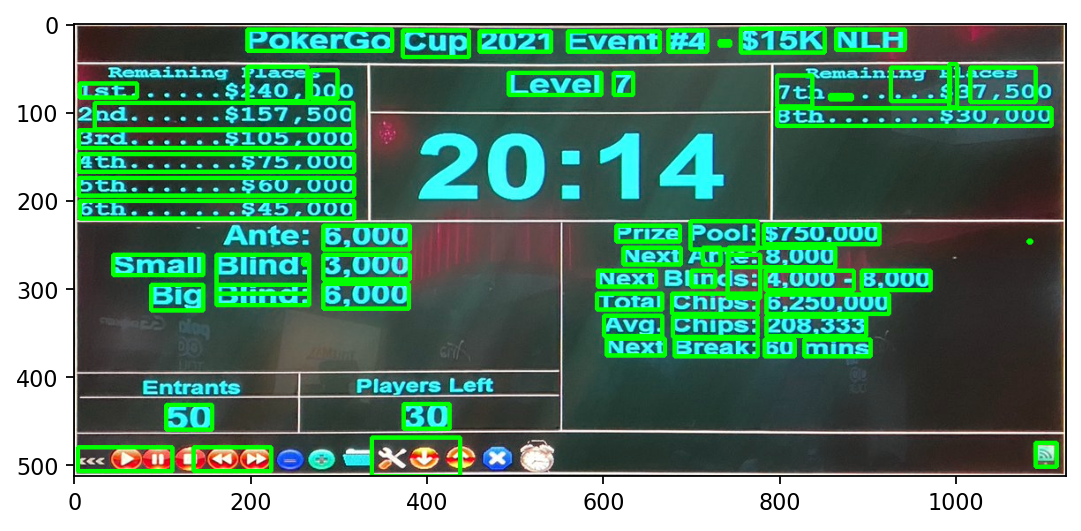

In [210]:
custom_config = r'--oem 3 --psm 6 --user-patterns patterns.txt'
    #-c tessedit_char_whitelist=PrizePool$123456789stndrdth.,:'
details = pytesseract.image_to_data(roi, output_type=Output.DICT, config=custom_config, lang="eng")

print(len(details['text']))
for i in range(len(details['level'])):
    if (int(details['conf'][i]) >= 0):
        print(str(i) + ": " + str(details['conf'][i]) + "% " + str(details['text'][i]))
box_img = gray

box_img = np.copy(roiFull)
total_box = len(details['text'])

for num in range(total_box):
    if int(details['conf'][num]) >= 0:
        (x,y,w,h) = (details['left'][num], details['top'][num], details['width'][num], details['height'][num])
        box_img = cv2.rectangle(box_img, (x,y), (x+w, y+h), (0,255,0),4)
        
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=160)
plt.imshow(box_img)
plt.show()